In [53]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from sklearn.svm import SVC
from scipy.io import wavfile
from scipy.signal import stft
from matplotlib.pylab import *
from scipy.stats import multivariate_normal

# Problem 1

In [54]:
am1 = np.array([0,0])
am2 = np.array([4,0])
ac1 = np.diag([1,1])
ac2 = np.diag([1,1])

bm1 = np.array([0,0])
bm2 = np.array([4,3])
bc1 = np.diag([1,2])
bc2 = np.diag([1,1])

cm1 = np.array([0,0])
cm2 = np.array([1/2,0])
cc1 = np.diag([1,2])
cc2 = np.diag([1,1])

dm1 = np.array([0,0])
dm2 = np.array([4,0])
dc1 = np.diag([1,2])
dc2 = np.diag([2,1])

In [55]:
def draw(gaussian1,gaussian2,diff):
    plt.figure()
    contour1 = plt.contour(X, Y, gaussian1, cmap=cm.spring)
    plt.clabel(contour1, inline=1, fontsize=10)
    contour2 = plt.contour(X, Y, gaussian2, cmap=cm.summer)
    plt.clabel(contour2, inline=1, fontsize=10)
    dis = plt.contour(X, Y, diff, 0, colors='k')
    plt.clabel(dis, inline=1, fontsize=10)
    plt.show()
    
def distribution(x,y,m1,m2,c1,c2):
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(m1, c1)
    rv2 = multivariate_normal(m2, c2)
    draw(rv1.pdf(pos),rv2.pdf(pos),rv1.pdf(pos)-rv2.pdf(pos))

def pdf(x,y,mean,cov):
    X = np.array((x-mean[0],y-mean[1]))
    Cov_inv = linalg.inv(cov)
    X_ = -1./2*X.dot(Cov_inv)
    return X_.dot(X.T)

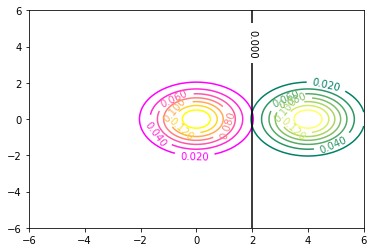

equation = 
[2.00000000000000]


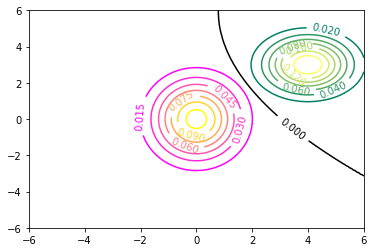

equation = 
[0.0625*y**2 - 0.75*y + 3.125]


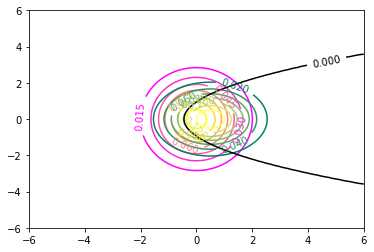

equation = 
[0.5*y**2 + 0.25]


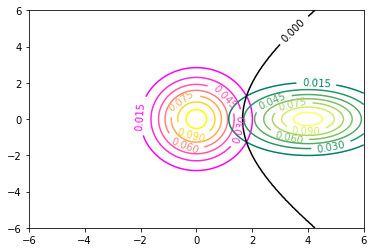

equation = 
[-sqrt(y**2 + 32.0) - 4.0, sqrt(y**2 + 32.0) - 4.0]


In [56]:
from sympy import solve
from sympy.abc import x,y
X, Y = np.mgrid[-6:6:100j, -6:6:100j]

distribution(X,Y,am1,am2,ac1,ac2)
equation = solve(pdf(x,y,am1,ac1)-pdf(x,y,am2,ac2),x)
print ("equation = ")
print (equation)

distribution(X,Y,bm1,bm2,bc1,bc2)
equation = solve(pdf(x,y,bm1,bc1)-pdf(x,y,bm2,bc2),x)
print ("equation = ")
print (equation)

distribution(X,Y,cm1,cm2,cc1,cc2)
equation = solve(pdf(x,y,cm1,cc1)-pdf(x,y,cm2,cc2),x)
print ("equation = ")
print (equation)

distribution(X,Y,dm1,dm2,dc1,dc2)
equation = solve(pdf(x,y,dm1,dc1)-pdf(x,y,dm2,dc2),x)
print ("equation = ")
print (equation)

# Problem 2

In [57]:
train_data = []
test_data = []
data = scipy.io.loadmat('digits-labels.mat')
l = data['l']
d = data['d']
# 0-9 ten digits, first 100 samples be training data, otherwise, test samples
for i in range(0,10):
    data_digits = d[:,find(l==i)]
    if len(train_data)==0:
        train_data = data_digits[:,0:100]
    else:
        train_data = append(train_data, data_digits[:,0:100], axis=1)
    test_data.append(data_digits[:,100:])

In [58]:
# Perform PCA by diagonalizing the coavariance
def pca(x, k):
    # Remove data mean
    xm = x - mean( x, axis=1, keepdims=True)
    # Get covariance estimate
    C = xm.dot( xm.T) / (xm.shape[1]-1)
    # Get top k PCA covariance eigenvectors/values
    v,u = scipy.sparse.linalg.eigsh( C, k=k)
    # Get overall transform and the input's projection to k dimensions
    w = diag( 1./sqrt(v)).dot( u.T)
    y = w.dot( xm)
    return w,y

In [59]:
def Model(train_data,test_data,n):
    result = []
    w, y= pca(train_data, n)
    for digit_label in range(10):
        test = w.dot((test_data[digit_label].T - mean(train_data, axis=1)).T)
        positive = 0 # store number of positive data
        total = test.shape[1] # number of total current test data
        temp = np.zeros(total) #store temp max probability, if current probability > temp, it belongs current digit label
        labels = np.zeros(total) #store predicted label
        for i in range(10):
            gaussian = multivariate_normal(mean(y[:,i*100:(i+1)*100],axis=1),cov(y[:,i*100:(i+1)*100]),allow_singular=True)
            probability = np.apply_along_axis(gaussian.pdf, 0, test)
            for j in range(len(probability)):
                if probability[j] > temp[j]:
                    labels[j] = i
                    temp[j] = probability[j]
        for k in range(total):
            if labels[k] == digit_label:
                positive = positive + 1
        result.append(positive/total)
    return result

acc_avg = 0
n = 1
while(acc_avg<0.9):
    acc_avg = mean(Model(train_data,test_data,n))
    n = n+1
print (n-1)

17


As we can see above, we have to use at least 17 dimensions to obtain average performance above 90% for first 100 data as training data, the rest as test data.

# Problem 3

In [60]:
music = []
speech = []
for i in range(1, 61):
    rate_music, data_music = wavfile.read('SpeechMusic/music/{0}.wav'.format(i))
    rate_speech, data_speech = wavfile.read('SpeechMusic/speech/{0}.wav'.format(i))
    f_music, t_music, STFT_music = scipy.signal.stft(data_music, fs = rate_music, window ='hamming', nperseg = rate_music, noverlap = 10000)
    f_speech, t_speech, STFT_speech = scipy.signal.stft(data_speech, fs = rate_speech, window ='hamming', nperseg = rate_speech, noverlap = 10000)
    if len(music) == 0:
        music = np.log(np.abs(STFT_music))
    else:
        music = np.concatenate((music, np.log(np.abs(STFT_music))), axis = 1)
    if len(speech) == 0:
        speech = np.log(np.abs(STFT_speech))
    else:
        speech = np.concatenate((speech, np.log(np.abs(STFT_speech))), axis = 1)

rate_speech, data_speech = wavfile.read('SpeechMusic/speech/340.wav'.format(i))
f_speech, t_speech, STFT_speech = scipy.signal.stft(data_speech, fs = rate_speech, window ='hamming', nperseg = rate_speech, noverlap = 10000)
speech = np.concatenate((speech, np.log(np.abs(STFT_speech))), axis = 1)

train_music = music[:,0:math.ceil(music.shape[1]*0.9)]
test_music = music[:,math.ceil(music.shape[1]*0.9):]
train_speech = speech[:,0:math.ceil(speech.shape[1]*0.9)]
test_speech = speech[:,math.ceil(speech.shape[1]*0.9):]
train_data = append(train_music, train_speech, axis=1)
test_data = append(test_music, test_speech, axis=1)
train_labels = append(np.zeros(train_music.shape[1]), np.ones(train_speech.shape[1]))
test_labels = append(np.zeros(test_music.shape[1]), np.ones(test_speech.shape[1]))

In [61]:
# Perform PCA by diagonalizing the coavariance
def pca(x, k):
    # Remove data mean
    xm = x - mean( x, axis=1, keepdims=True)
    # Get covariance estimate
    C = xm.dot( xm.T) / (xm.shape[1]-1)
    # Get top k PCA covariance eigenvectors/values
    v,u = scipy.sparse.linalg.eigsh( C, k=k)
    # Get overall transform and the input's projection to k dimensions
    w = diag( 1./sqrt(v)).dot( u.T)
    y = w.dot( xm)
    return w,y

In [62]:
w, y = pca(train_data, 10)
test_music_pca = w.dot((test_data.T - mean(train_data, axis=1)).T)
clf = SVC()
clf.fit(y.transpose(), train_labels)
# print(clf.score(y.transpose(),train_labels))
print(clf.score(test_music_pca.transpose(),test_labels))

0.833333333333


# Problem 4

In [63]:
from PIL import Image
import os, numpy as np

dir_pos = 'sample/pos/'
dir_neg = 'sample/neg/'

img = Image.open("train_pos.png")
k = 0
for j in range(0,50):
    for i in range(0,50):
        area = (i*16, j*16, (i+1)*16, (j+1)*16)
        cropped_img = img.crop(area)
        cropped_img.save(dir_pos+str(k)+".png","png")
        k = k+1
k = 0
img = Image.open("train_neg.png")
for j in range(0,50):
    for i in range(0,50):
        area = (i*16, j*16, (i+1)*16, (j+1)*16)
        cropped_img = img.crop(area)
        cropped_img.save(dir_neg+str(k)+".png","png")
        k = k + 1

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
ims = [read(os.path.join(dir_pos, filename)) for filename in os.listdir(dir_pos)]
training_pos = np.array(ims, dtype='uint8')

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
ims = [read(os.path.join(dir_neg, filename)) for filename in os.listdir(dir_neg)]
training_neg = np.array(ims, dtype='uint8')

training_data = append(training_pos, training_neg, axis=0)
training_label = append(np.ones(training_pos.shape[0]), np.zeros(training_neg.shape[0]))
training_data = (training_data.reshape(5000,768)).T

img = Image.open('./ekalismall2.png')
k = 0
for j in range(0,54):
    for i in range(0,38):
        area = (i*16, j*16, (i+1)*16, (j+1)*16)
        cropped_img = img.crop(area)
        cropped_img.save("sample/test/"+str(k)+".png","png")
        k = k+1
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
ims = [read(os.path.join("sample/test/", filename)) for filename in os.listdir("sample/test/")]
test = np.array(ims, dtype='uint8')
test_data = test.reshape(2052,768)

In [64]:
# Perform PCA by diagonalizing the coavariance
def pca(x, k):
    # Remove data mean
    xm = x - mean( x, axis=1, keepdims=True)
    # Get covariance estimate
    C = xm.dot( xm.T) / (xm.shape[1]-1)
    # Get top k PCA covariance eigenvectors/values
    v,u = scipy.sparse.linalg.eigsh( C, k=k)
    # Get overall transform and the input's projection to k dimensions
    w = diag( 1./sqrt(v)).dot( u.T)
    y = w.dot( xm)
    return w,y

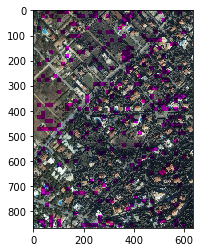

In [65]:
w, y = pca(training_data,40)
test_pca = w.dot((test_data - np.tile(mean(training_data, axis=1),(2052,1))).T)
positive = 0
total = test_pca.shape[1]
temp = np.zeros(total)
labels = np.zeros(total)
for i in range(2):
    model = multivariate_normal(mean(y[:,i*2500 : (i+1)*2500],axis=1), cov(y[:,i*2500 : (i+1)*2500]),  allow_singular=True)
    probability = np.apply_along_axis(model.pdf, 0, test_pca)
    for j in range(len(probability)):
        if probability[j] > temp[j]:
            labels[j] = i
            temp[j] = probability[j]
pool_idx = np.where(labels == 0)[0]
im = plt.imread('ekalismall2.png')
for i in pool_idx:
    im[math.floor(i/38)*16:math.ceil(i/38)*16,(i%38)*16:((i%38)+1)*16, 1] = 255
plt.imshow(im)
plt.show()